In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
mart_data = pd.read_csv('MartTrain.csv')

In [3]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
mart_data.shape

(8523, 12)

In [5]:
mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Lets replae null values with mean for numbers and mode for objects.

In [8]:
imputer = SimpleImputer(strategy = 'mean')
mart_data['Item_Weight'] = imputer.fit_transform(mart_data[['Item_Weight']])

In [9]:
outlet_size_mode = mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
print(outlet_size_mode)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [10]:
missing_vals = mart_data['Outlet_Size'].isnull()

In [11]:
mart_data.loc[missing_vals, 'Outlet_Size'] = mart_data.loc[missing_vals,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [12]:
mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Axes: >

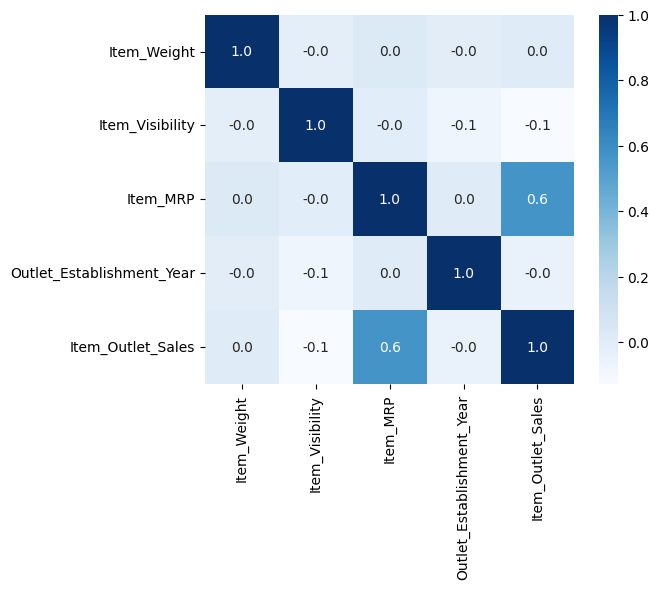

In [14]:
correlation = mart_data.corr(numeric_only = True)
sns.heatmap(correlation, square = True, cbar=True, fmt='.1f',annot=True, cmap='Blues')

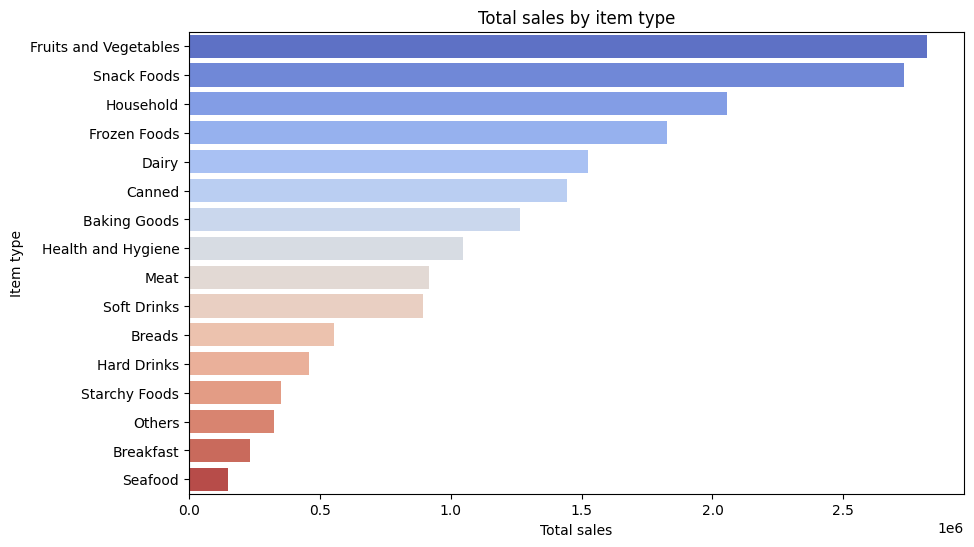

In [15]:
item_sales = mart_data.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending = False)
plt.figure(figsize=(10, 6))
sns.barplot(x = item_sales.values, y = item_sales.index, palette = 'coolwarm', hue = item_sales.index)
plt.title('Total sales by item type')
plt.xlabel('Total sales')
plt.ylabel('Item type')
plt.show()

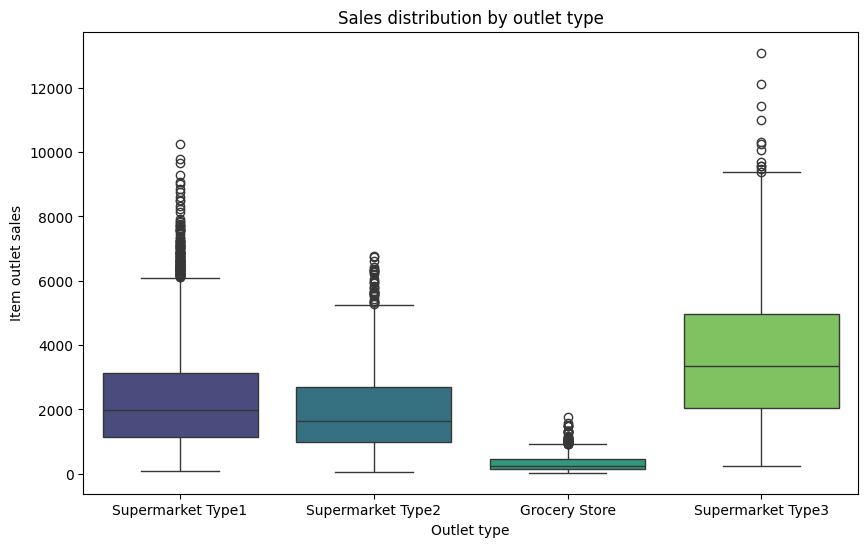

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = mart_data, x='Outlet_Type', y='Item_Outlet_Sales', palette='viridis', hue = 'Outlet_Type')
plt.title('Sales distribution by outlet type')
plt.xlabel('Outlet type')
plt.ylabel('Item outlet sales')
plt.show()

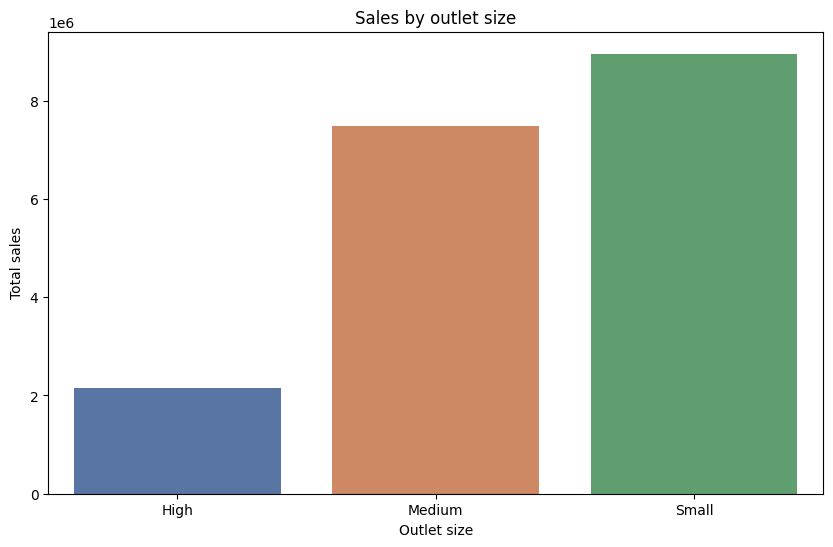

In [17]:
outlet_size_sales = mart_data.groupby('Outlet_Size')['Item_Outlet_Sales'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x = outlet_size_sales.index, y = outlet_size_sales.values, palette='deep', hue = outlet_size_sales.index)
plt.title('Sales by outlet size')
plt.xlabel('Outlet size')
plt.ylabel('Total sales')
plt.show()

In [18]:
mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [19]:
mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [20]:
mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

# Dataset cleaned.

# Replacing object data with numeric type for easy processing of model.

In [21]:
Y = mart_data['Item_Outlet_Sales']
mart_data.drop(columns='Item_Outlet_Sales', axis=1, inplace = True)

In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output = False)

In [29]:
num_df = mart_data.select_dtypes(include=['int64', 'float64'])
object_cols = mart_data.select_dtypes(include=['object']).columns
transformed_data = encoder.fit_transform(mart_data[object_cols])
obj_df = pd.DataFrame(transformed_data) 
print(object_cols)

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [30]:
encoded_cols_names = encoder.get_feature_names_out(object_cols)
obj_df = pd.DataFrame(transformed_data, columns = encoded_cols_names, index = mart_data.index)

In [31]:
obj_df.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [32]:
new_mart_data = pd.concat([num_df, obj_df], axis = 1, ignore_index=True)

In [33]:
new_mart_data.head()

,0,1,2,3,4,5,6,7,8,9,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600
0,9.30,0.016047,249.8092,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.92,0.019278,48.2692,2009,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,17.50,0.016760,141.6180,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.20,0.000000,182.0950,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,8.93,0.000000,53.8614,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [34]:
new_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Columns: 1601 entries, 0 to 1600
dtypes: float64(1600), int64(1)
memory usage: 104.1 MB


In [35]:
X = new_mart_data

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Using XGBoost Regressor.

In [37]:
from xgboost import XGBRegressor
from sklearn import metrics
XGBreg = XGBRegressor()

In [38]:
XGBreg.fit(X_train, Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [39]:
X_train_preds = XGBreg.predict(X_train)

In [40]:
r2_score = metrics.r2_score(Y_train, X_train_preds)
print(r2_score)

0.7166846029220196


In [41]:
X_test_preds = XGBreg.predict(X_test)

In [42]:
r2_score = metrics.r2_score(Y_test, X_test_preds)
print(r2_score)

0.5695204059633868


# Using normal Gradient Boosting Regressor.

In [43]:
 from sklearn.ensemble import GradientBoostingRegressor
 gb_reg = GradientBoostingRegressor(max_depth = 2, n_estimators = 15, n_iter_no_change=10, learning_rate = 1.0, random_state = 42)
 gb_reg.fit(X_train, Y_train)

,loss,'squared_error'
,learning_rate,1.0
,n_estimators,15
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,2
,min_impurity_decrease,0.0
,init,None


In [44]:
gb_reg.n_estimators_

14

In [45]:
X_train_preds = gb_reg.predict(X_train)

In [46]:
r2_score = metrics.r2_score(Y_train, X_train_preds)
r2_score

0.6013592473841862

In [47]:
X_test_preds = gb_reg.predict(X_test)

In [48]:
r2_score = metrics.r2_score(Y_test, X_test_preds)
r2_score

0.5712648254743338

# Normal gradient boosting perform slightly better.

# Lets try using Adaboost regressor.

In [49]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
adab_reg = AdaBoostRegressor(n_estimators = 100, learning_rate = 1.0, loss = 'linear', random_state = 42)

In [50]:
adab_reg.fit(X_train, Y_train)

,estimator,None
,n_estimators,100
,learning_rate,1.0
,loss,'linear'
,random_state,42


In [51]:
X_train_preds = adab_reg.predict(X_train)

In [52]:
r2_score = metrics.r2_score(Y_train, X_train_preds)
r2_score

0.45242086055025543

In [53]:
X_test_preds = adab_reg.predict(X_test)

In [54]:
r2_score = metrics.r2_score(Y_test, X_test_preds)
r2_score

0.44075546980705305

# Adaboost Regressor did not work well, lets try using Stacking Regressor.

In [55]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

In [56]:
estimators = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators = 100, random_state = 42, max_depth = 10)),
    ('xgb', XGBRegressor(n_estimators=100, learning_rate=  0.1, random_state = 42)),
    ('svr', SVR(kernel='rbf', C = 100, epsilon = 0.1)),
    ('gbr', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42))
]
final_model = Ridge()

In [57]:
stacking_reg = StackingRegressor(estimators = estimators, final_estimator = final_model, cv = 5, n_jobs=-1,)
stacking_reg.fit(X_train, Y_train)

,estimators,"[('lr', ...), ('rf', ...), ...]"
,final_estimator,Ridge()
,cv,5
,n_jobs,-1
,passthrough,False
,verbose,0
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [58]:
X_train_preds = stacking_reg.predict(X_train)

In [59]:
r2_score = metrics.r2_score(Y_train, X_train_preds)
r2_score

0.6774860216187525

In [60]:
X_test_preds = stacking_reg.predict(X_test)

In [61]:
r2_score = metrics.r2_score(Y_test, X_test_preds)
r2_score

0.6074441687720282

# The Stacking Regressor has performed better compared to the other three regressors used previously.